# Loading the dataset

In [1]:
import pandas as pd     
import numpy as np      
import matplotlib.pyplot as plt      
import seaborn as sns 

In [2]:
df= pd.read_csv("HR_Vvision.csv")

In [3]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales  medium  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14994                      0    support     low  
14995                      0    support     low  
14996                      0    support     low  
14997                      0    support     low  
14998                      0    support     low  

[14999 rows x 10 columns]

# Data Exploration (Initial EDA and Data Cleaning)

In [4]:
# Gather basic information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data

df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [6]:
# correct column names
df.rename(columns={'average_montly_hours':'average_monthly_hours', 
                     'Work_accident':'work_accident'}, inplace=True)

In [7]:
#view the data exploring and the distribution of categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(df[column].value_counts())
        print("                                  ")
        print("++++++++++++++++++++++++++++++++++")
        print("                                  ")

Department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64
                                  
++++++++++++++++++++++++++++++++++
                                  
salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64
                                  
++++++++++++++++++++++++++++++++++
                                  


In [8]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
#check for duplicate data
#df.duplicated().sum()

In [10]:
#df.drop_duplicates(inplace=True)

In [11]:
#df

C:\Users\Dell\AppData\Local\Temp\ipykernel_9912\1953861222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


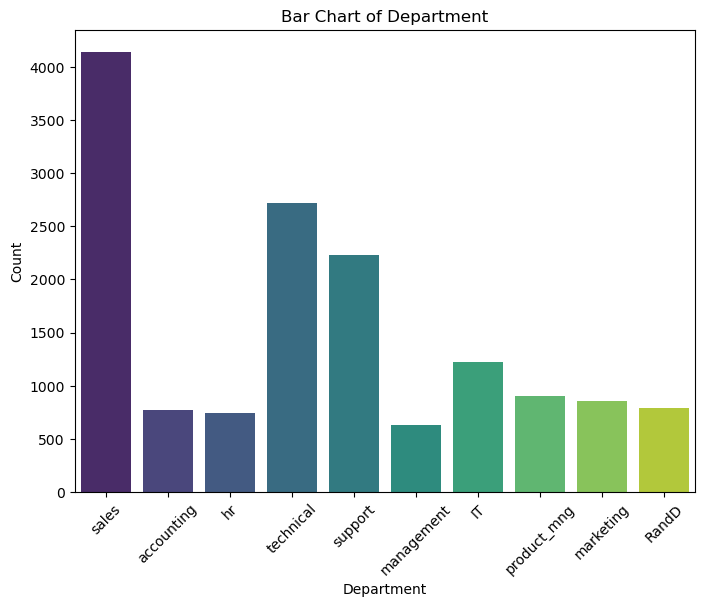

C:\Users\Dell\AppData\Local\Temp\ipykernel_9912\1953861222.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='viridis')


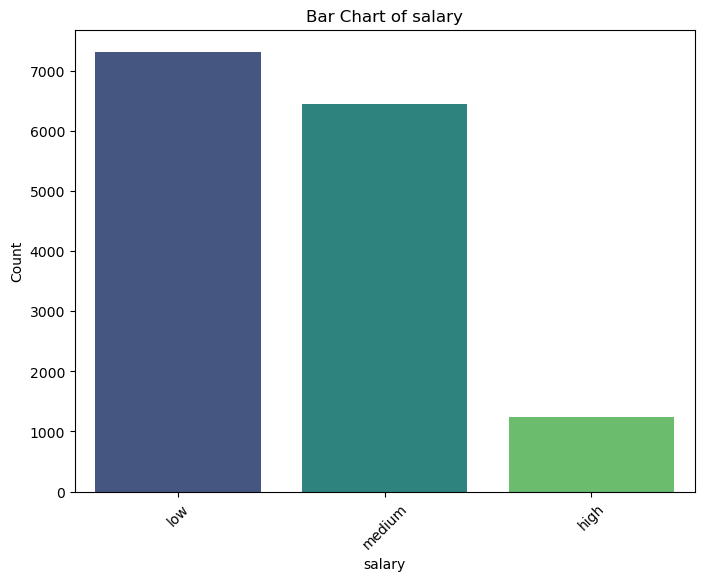

In [12]:
# Use Bar Charts or Pie Charts for Categorical Variables

categorical_columns = ['Department', 'salary']

# Plot bar charts for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

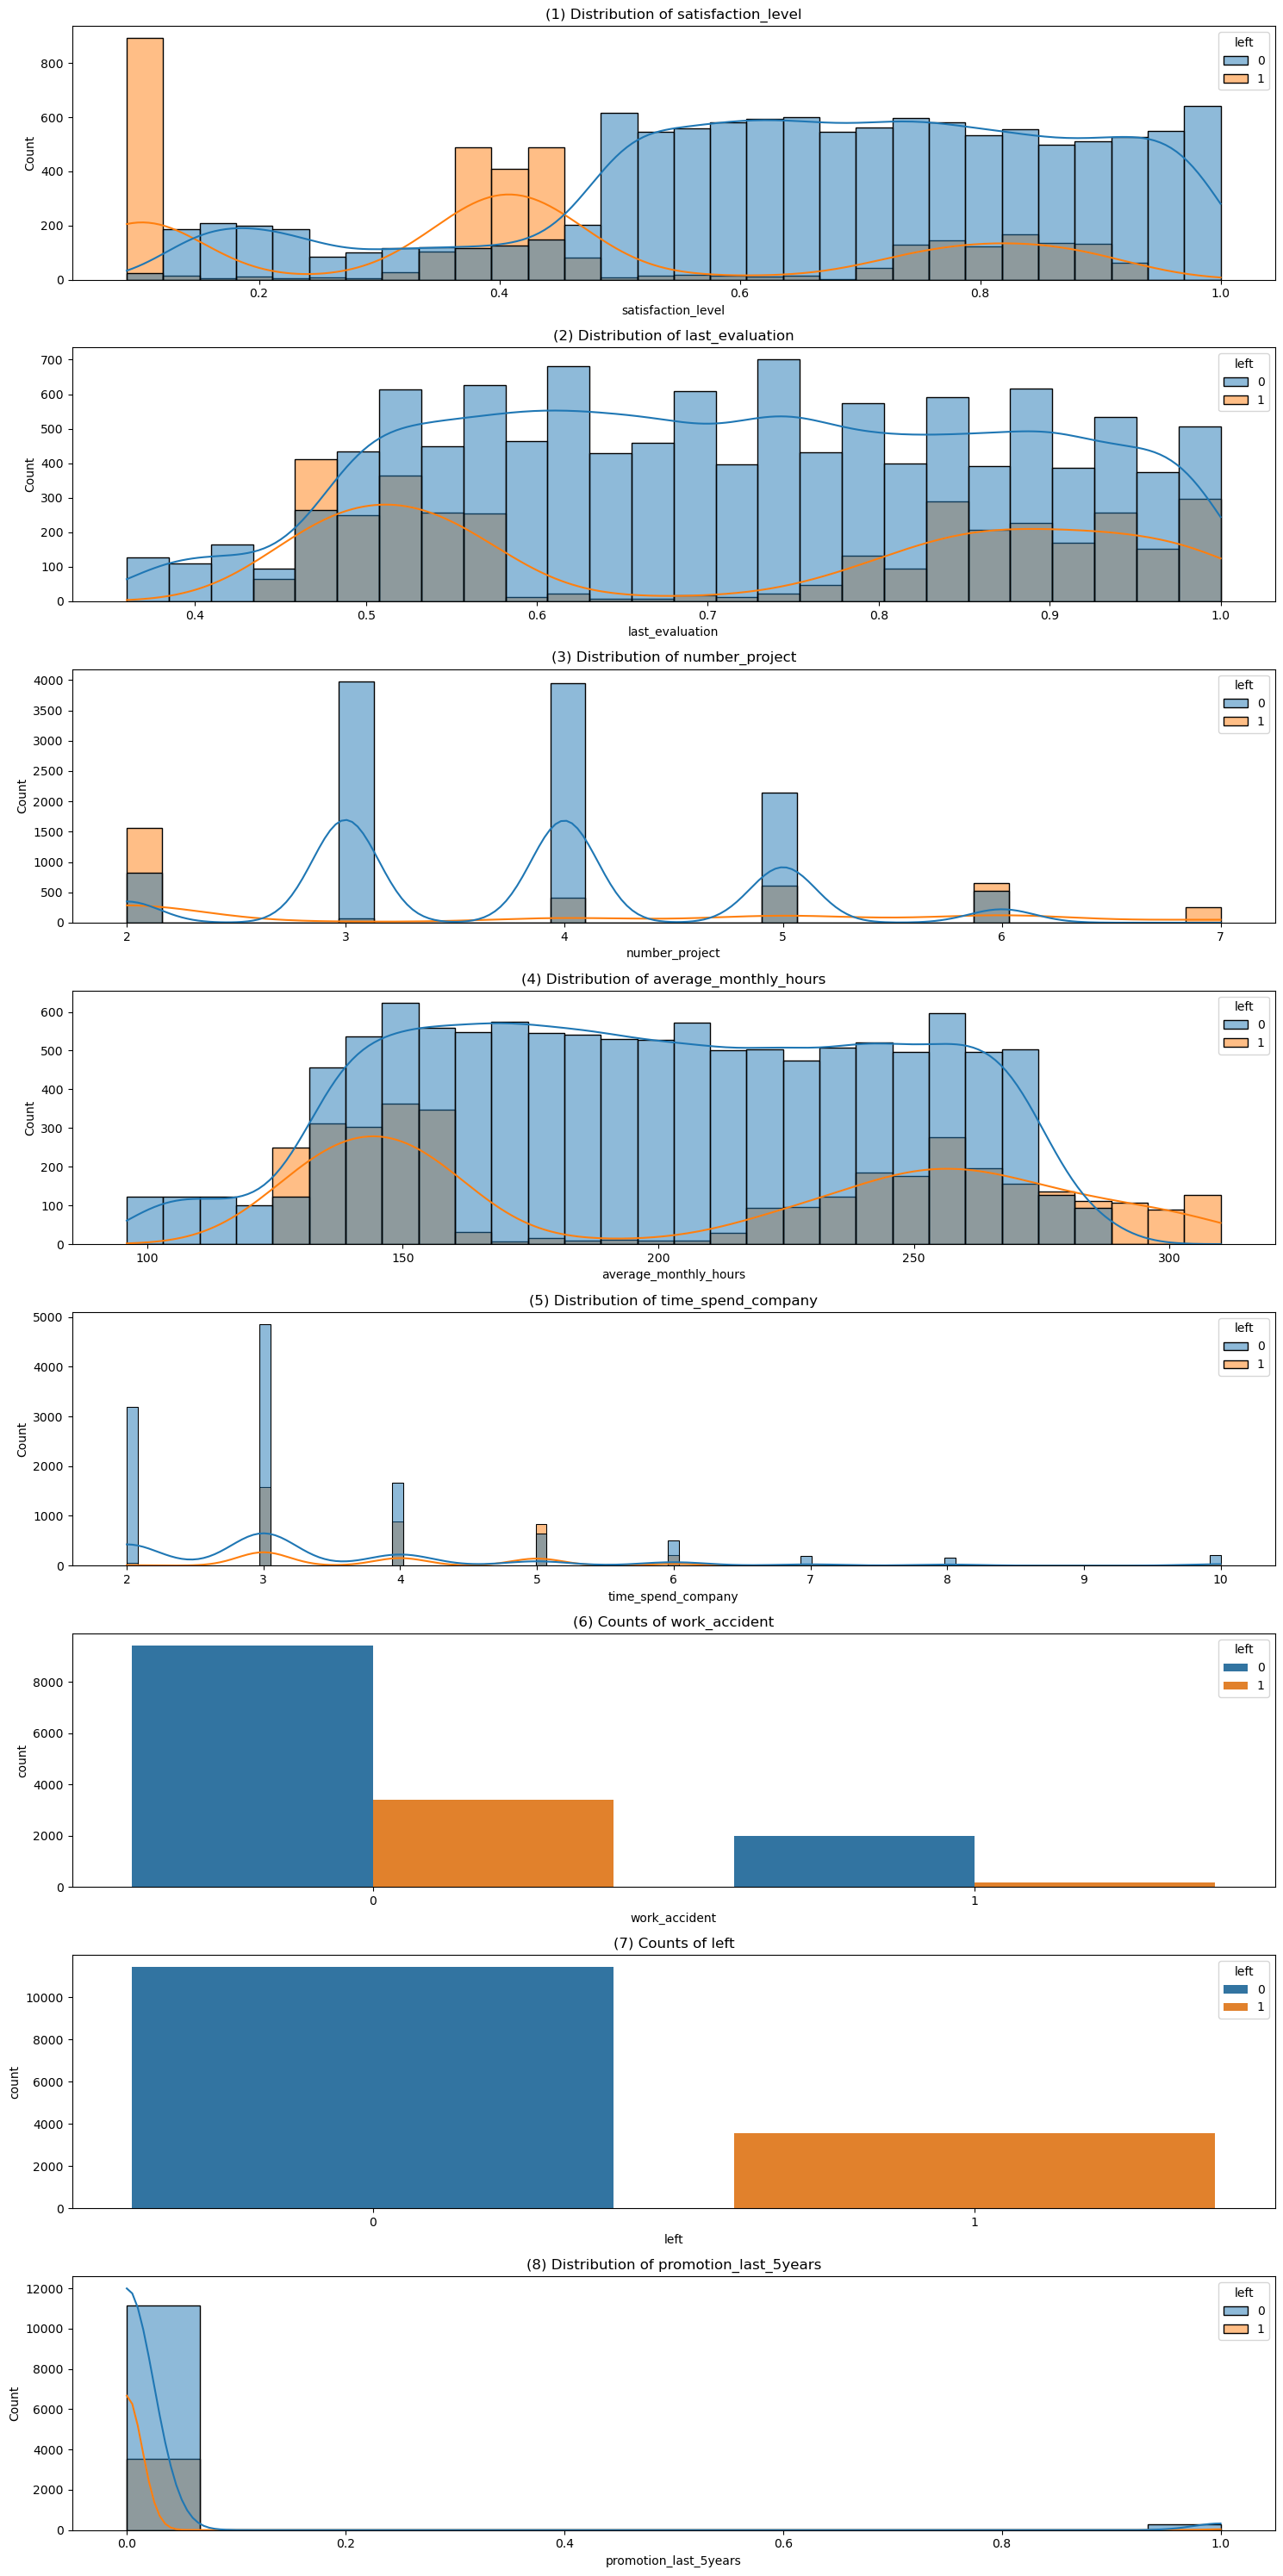

In [13]:
# set figure & size
fig, axes = plt.subplots(8,1, figsize=(15,30))

# (3) Distribution of satisfaction_level
sns.histplot(data=df, x='satisfaction_level', hue='left', ax=axes[0], kde=True)
axes[0].set_title('(1) Distribution of satisfaction_level')

# (3) Distribution of last_evaluation
sns.histplot(data=df, x='last_evaluation', hue='left', ax=axes[1], kde=True)
axes[1].set_title('(2) Distribution of last_evaluation')

# (3) Distribution of number_project
sns.histplot(data=df, x='number_project', hue='left', ax=axes[2], kde=True)
axes[2].set_title('(3) Distribution of number_project')

# (4) Distribution of average_monthly_hours
sns.histplot(data=df, x='average_monthly_hours', hue='left', ax=axes[3], kde=True)
axes[3].set_title('(4) Distribution of average_monthly_hours')

# (5) Distribution of time_spend_company
sns.histplot(data=df, x='time_spend_company', hue='left', ax=axes[4], kde=True)
axes[4].set_title('(5) Distribution of time_spend_company')

# (6) Distribution of work_accident
sns.countplot(data=df, x='work_accident', hue='left', ax=axes[5])
axes[5].set_title('(6) Counts of work_accident')

# (7) Distribution of left
sns.countplot(data=df, x='left', hue='left', ax=axes[6])
axes[6].set_title('(7) Counts of left')

# (8) Distribution of promotion_last_5years
sns.histplot(data=df, x='promotion_last_5years', hue='left', ax=axes[7], kde=True)
axes[7].set_title('(8) Distribution of promotion_last_5years')

# clean vizzs
plt.tight_layout()

In [14]:
df.drop(['Department', 'salary'],axis=1).corr()

satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_monthly_hours           -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_monthly_hours  time_spend_company  \
satisfaction_level                 -0.020048           -0.100866   
last_evaluation                     0.339742            0.131591   
number_project                      0.417211            0.196786   
average_monthly_hours               1.000000            0.127755   
time_spend_company                  0.127755            1.000000   
work_accident                      -0.010143            0.002120   
left                                0.071287            0.144822   
promotion_last_5years              -0.003544            0.067433   

                       work_accident      left  promotion_last_5years  
satisfaction_level          0.058697 -0.388375               0.025605  
last_evaluation            -0.007104  0.006567              -0.008684  
number_project             -0.004741  0.023787              -0.006064  
average_monthly_hours      -0.010143  0.071287              -0.003544  
time_spend_company          0.002120  0.144822               0.067433  
work_accident               1.000000 -0.154622               0.039245  
left                       -0.154622  1.000000              -0.061788  
promotion_last_5years       0.039245 -0.061788               1.000000

<Axes: >

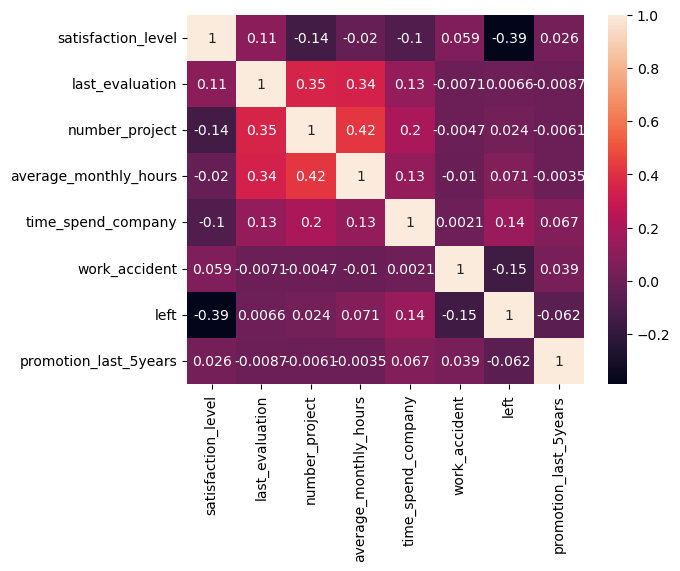

In [15]:
sns.heatmap(df.drop(['Department', 'salary'], axis=1).corr(), annot=True)# this the correlation of dataset except the fields we dropped

<Axes: >

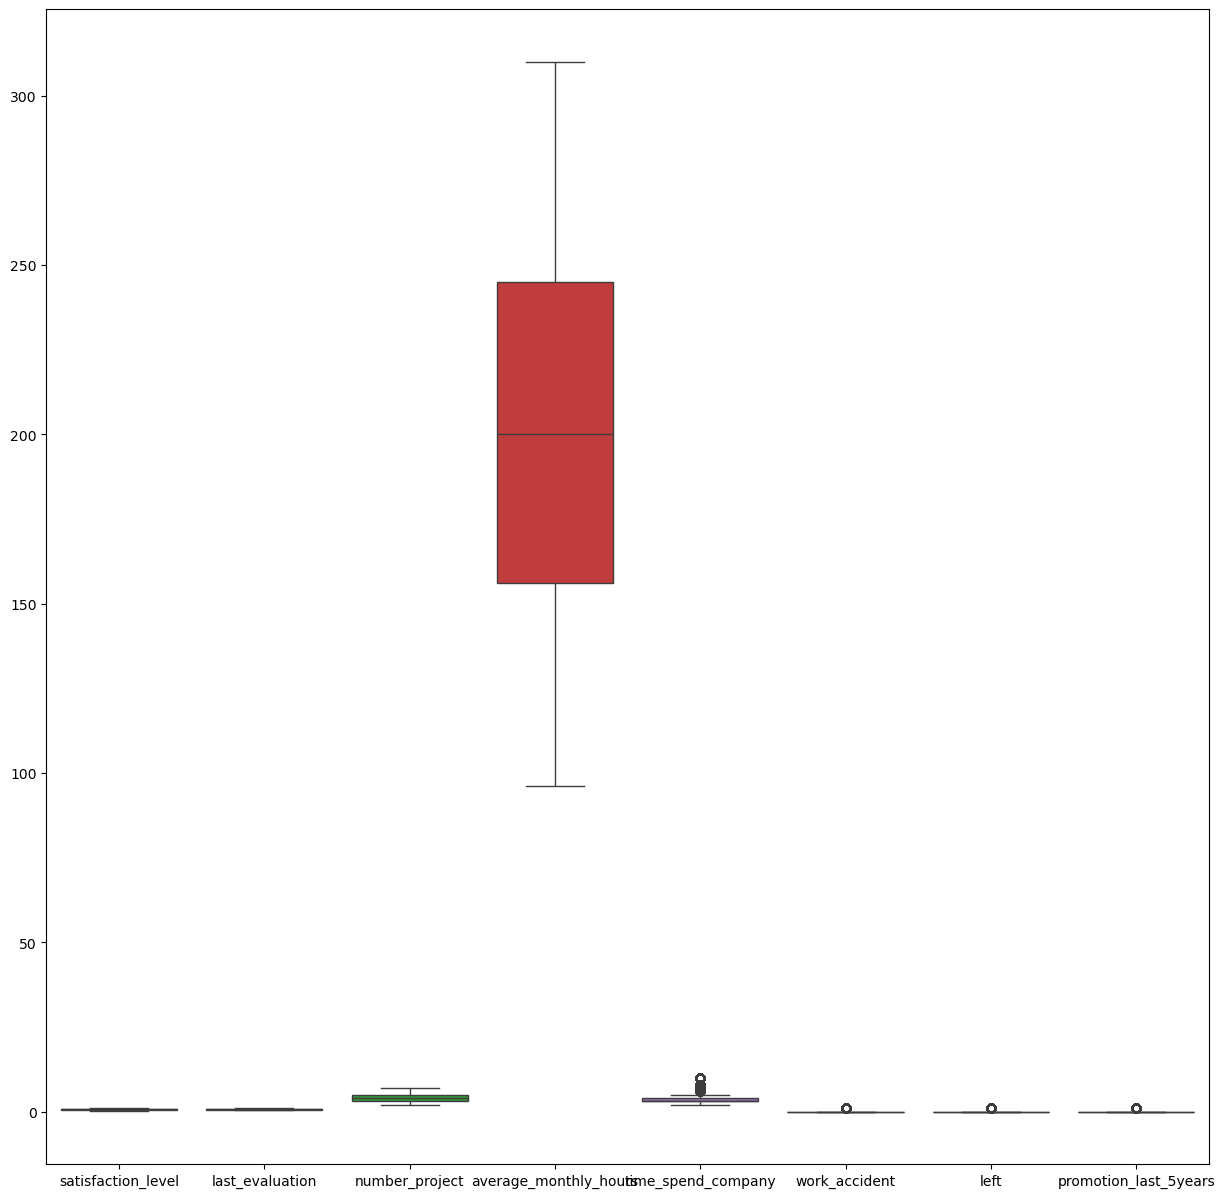

In [16]:
#Check the data distribution
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(df)

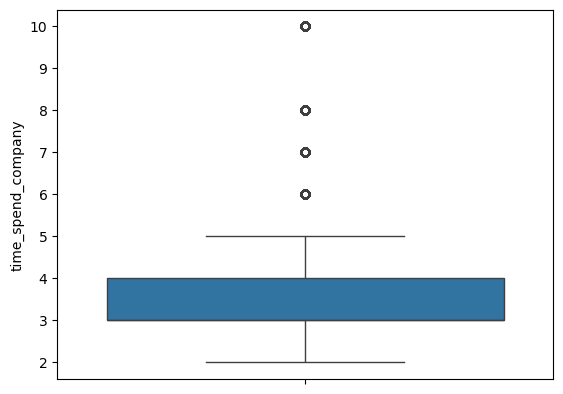

In [17]:
#check the data distribution of tenure column
sns.boxplot(df['time_spend_company'])
plt.ylabel('time_spend_company')
plt.show()


Removing Outliers in time_spend_company column

Outliers:
       satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
14942                0.20             0.50               5   
14947                0.91             0.98               4   
14977                0.81             0.85               4   
14986                0.85             0.85               4   
14993                0.76             0.83               6   

       average_monthly_hours  time_spend_company  work_accident  left  \
1                        262                   6              0     1   
17                       255                   6              0     1   
34                       2

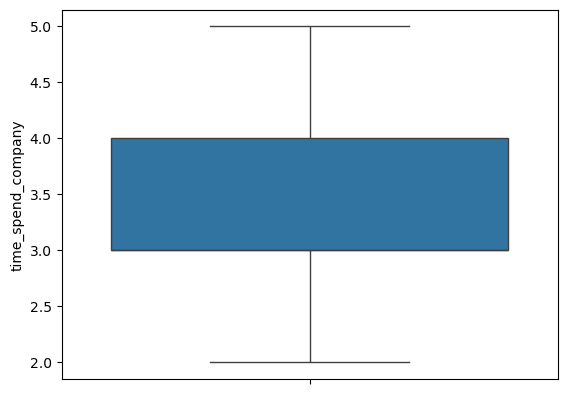

In [18]:

# Step 1: Calculate the IQR for the 'time_spend_company' column
Q1 = df['time_spend_company'].quantile(0.25)  # 25th percentile (first quartile)
Q3 = df['time_spend_company'].quantile(0.75)  # 75th percentile (third quartile)
IQR = Q3 - Q1  # Interquartile Range

# Step 2: Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['time_spend_company'] < lower_bound) | (df['time_spend_company'] > upper_bound)]

# Print the outliers (optional)
print("Outliers:")
print(outliers)

# Step 4: Remove the outliers and replace them with the median value
median_value = df['time_spend_company'].median()

# Replace outliers with median
df['time_spend_company'] = df['time_spend_company'].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

# Verify the changes
#(df['time_spend_company'].describe())

sns.boxplot(df['time_spend_company'])
plt.ylabel('time_spend_company')
plt.show()

In [19]:
# Example: binning 'satisfaction_level' into low (0), medium (1), high (2)
df['satisfaction_level_category'] = pd.cut(df['satisfaction_level'], bins=[0, 0.4, 0.7, 1], labels=[0, 1, 2])



In [20]:
df.head(40)

satisfaction_level  last_evaluation  number_project  \
0                 0.38             0.53               2   
1                 0.80             0.86               5   
2                 0.11             0.88               7   
3                 0.72             0.87               5   
4                 0.37             0.52               2   
5                 0.41             0.50               2   
6                 0.10             0.77               6   
7                 0.92             0.85               5   
8                 0.89             1.00               5   
9                 0.42             0.53               2   
10                0.45             0.54               2   
11                0.11             0.81               6   
12                0.84             0.92               4   
13                0.41             0.55               2   
14                0.36             0.56               2   
15                0.38             0.54               2   
16                0.45             0.47               2   
17                0.78             0.99               4   
18                0.45             0.51               2   
19                0.76             0.89               5   
20                0.11             0.83               6   
21                0.38             0.55               2   
22                0.09             0.95               6   
23                0.46             0.57               2   
24                0.40             0.53               2   
25                0.89             0.92               5   
26                0.82             0.87               4   
27                0.40             0.49               2   
28                0.41             0.46               2   
29                0.38             0.50               2   
30                0.09             0.62               6   
31                0.45             0.57               2   
32                0.40             0.51               2   
33                0.45             0.55               2   
34                0.84             0.87               4   
35                0.10             0.94               6   
36                0.38             0.46               2   
37                0.45             0.50               2   
38                0.11             0.89               6   
39                0.41             0.54               2   

    average_monthly_hours  time_spend_company  work_accident  left  \
0                     157                 3.0              0     1   
1                     262                 3.0              0     1   
2                     272                 4.0              0     1   
3                     223                 5.0              0     1   
4                     159                 3.0              0     1   
5                     153                 3.0              0     1   
6                     247                 4.0              0     1   
7                     259                 5.0              0     1   
8                     224                 5.0              0     1   
9                     142                 3.0              0     1   
10                    135                 3.0              0     1   
11                    305                 4.0              0     1   
12                    234                 5.0              0     1   
13                    148                 3.0              0     1   
14                    137                 3.0              0     1   
15                    143                 3.0              0     1   
16                    160                 3.0              0     1   
17                    255                 3.0              0     1   
18                    160                 3.0              1     1   
19                    262                 5.0              0     1   
20                    282                 4.0              0     1   
21                    147                 3.

In [21]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns in the dataset:")
print(categorical_columns)

Categorical columns in the dataset:
Index(['Department', 'salary', 'satisfaction_level_category'], dtype='object')


In [22]:
from sklearn.preprocessing import LabelEncoder
# Label encode 'Department' and 'salary'
label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['salary'] = label_encoder.fit_transform(df['salary'])

In [23]:
# Drop the 'satisfaction_level' column
df = df.drop(columns=['satisfaction_level'])

In [24]:
df.head(40)

last_evaluation  number_project  average_monthly_hours  \
0              0.53               2                    157   
1              0.86               5                    262   
2              0.88               7                    272   
3              0.87               5                    223   
4              0.52               2                    159   
5              0.50               2                    153   
6              0.77               6                    247   
7              0.85               5                    259   
8              1.00               5                    224   
9              0.53               2                    142   
10             0.54               2                    135   
11             0.81               6                    305   
12             0.92               4                    234   
13             0.55               2                    148   
14             0.56               2                    137   
15             0.54               2                    143   
16             0.47               2                    160   
17             0.99               4                    255   
18             0.51               2                    160   
19             0.89               5                    262   
20             0.83               6                    282   
21             0.55               2                    147   
22             0.95               6                    304   
23             0.57               2                    139   
24             0.53               2                    158   
25             0.92               5                    242   
26             0.87               4                    239   
27             0.49               2                    135   
28             0.46               2                    128   
29             0.50               2                    132   
30             0.62               6                    294   
31             0.57               2                    134   
32             0.51               2                    145   
33             0.55               2                    140   
34             0.87               4                    246   
35             0.94               6                    255   
36             0.46               2                    137   
37             0.50               2                    126   
38             0.89               6                    306   
39             0.54               2                    152   

    time_spend_company  work_accident  left  promotion_last_5years  \
0                  3.0              0     1                      0   
1                  3.0              0     1                      0   
2                  4.0              0     1                      0   
3                  5.0              0     1                      0   
4                  3.0              0     1                      0   
5                  3.0              0     1                      0   
6                  4.0              0     1                      0   
7                  5.0              0     1                      0   
8                  5.0              0     1                      0   
9                  3.0              0     1                      0   
10                 3.0              0     1                      0   
11                 4.0              0     1                      0   
12                 5.0              0     1                      0   
13                 3.0              0     1                      0   
14                 3.0              0     1                      0   
15                 3.0              0     1                      0   
16                 3.0              0     1                      0   
17                 3.0              0     1                      0   
18                 3.0              1     1                      1   
19                 5.0              0     1                  

In [25]:
# Convert target to categorical if it's not already
df['last_evaluation'] = df['last_evaluation'].astype('category')

# Verify conversion
print(df['last_evaluation'].dtype)  # Should print 'category'
print(df['last_evaluation'].unique())  # Print unique values to ensure they are discrete


category
[0.53, 0.86, 0.88, 0.87, 0.52, ..., 0.44, 0.36, 0.38, 0.40, 0.42]
Length: 65
Categories (65, float64): [0.36, 0.37, 0.38, 0.39, ..., 0.97, 0.98, 0.99, 1.00]


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set up the Target Variable ('last_evaluation')

In [27]:


# Define a threshold for 'last_evaluation' to classify performance as 'HIGH' (1) or 'LOW' (0)
threshold = 0.5
df['performance_score'] = df['last_evaluation'].apply(lambda x: 1 if x >= threshold else 0)

# Drop the 'last_evaluation' column
df = df.drop(columns=['last_evaluation'])

# Define features (X) and target (y)
X = df.drop(columns=['performance_score'])  # Features
y = df['performance_score']  # Target



In [28]:
df.head(10)

number_project  average_monthly_hours  time_spend_company  work_accident  \
0               2                    157                 3.0              0   
1               5                    262                 3.0              0   
2               7                    272                 4.0              0   
3               5                    223                 5.0              0   
4               2                    159                 3.0              0   
5               2                    153                 3.0              0   
6               6                    247                 4.0              0   
7               5                    259                 5.0              0   
8               5                    224                 5.0              0   
9               2                    142                 3.0              0   

   left  promotion_last_5years  Department  salary  \
0     1                      0           7       1   
1     1                      0           7       2   
2     1                      0           7       2   
3     1                      0           7       1   
4     1                      0           7       1   
5     1                      0           7       1   
6     1                      0           7       1   
7     1                      0           7       1   
8     1                      0           7       1   
9     1                      0           7       1   

  satisfaction_level_category  performance_score  
0                           0                  1  
1                           2                  1  
2                           0                  1  
3                           2                  1  
4                           0                  1  
5                           1                  1  
6                           0                  1  
7                           2                  1  
8                           2                  1  
9                           1                  1

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   number_project               14999 non-null  int64   
 1   average_monthly_hours        14999 non-null  int64   
 2   time_spend_company           14999 non-null  float64 
 3   work_accident                14999 non-null  int64   
 4   left                         14999 non-null  int64   
 5   promotion_last_5years        14999 non-null  int64   
 6   Department                   14999 non-null  int32   
 7   salary                       14999 non-null  int32   
 8   satisfaction_level_category  14999 non-null  category
 9   performance_score            14999 non-null  int64   
dtypes: category(1), float64(1), int32(2), int64(6)
memory usage: 952.3 KB


# Encode the Target Variable (performance_score)

In [30]:
# Encode the 'performance_score' target variable
df['performance_score'] = label_encoder.fit_transform(df['performance_score'])

# Define features (X) and target (y)
X = df.drop(columns=['performance_score'])  # Features
y = df['performance_score']  # Target

# Feature Scaling

In [31]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split

In [32]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Model 

In [33]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Model Evaluation 

In [34]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 91.30%


# Save the Model as a Pickle File

In [36]:
import pickle

# Define the filename for the pickle file
model_filename = 'rforest_model.pkl'

# Save the trained model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

print(f"Model saved to {model_filename}")

Model saved to rforest_model.pkl


In [35]:
# Load the trained model from the file
#with open(model_filename, 'rb') as file:
    #loaded_model = pickle.load(file)
